In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [2]:
nba=pd.read_csv(r"nba_2013.csv")
nba.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,4,15,0.266667,62,126,0.492063,0.482,35,53,0.660,72,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,0,0,NaN,93,185,0.502703,0.503,79,136,0.581,142,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,0,0,NaN,143,275,0.520000,0.520,76,119,0.639,102,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,128,300,0.426667,336,711,0.472574,0.522,274,336,0.815,32,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,0,1,0.000000,136,248,0.548387,0.546,56,67,0.836,94,183,277,40,23,46,63,187,328,2013-2014,2013


In [3]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   player        481 non-null    object 
 1   pos           481 non-null    object 
 2   age           481 non-null    int64  
 3   bref_team_id  481 non-null    object 
 4   g             481 non-null    int64  
 5   gs            481 non-null    int64  
 6   mp            481 non-null    int64  
 7   fg            481 non-null    int64  
 8   fga           481 non-null    int64  
 9   fg.           479 non-null    float64
 10  x3p           481 non-null    int64  
 11  x3pa          481 non-null    int64  
 12  x3p.          414 non-null    float64
 13  x2p           481 non-null    int64  
 14  x2pa          481 non-null    int64  
 15  x2p.          478 non-null    float64
 16  efg.          479 non-null    float64
 17  ft            481 non-null    int64  
 18  fta           481 non-null    

In [5]:
nba.shape

(481, 31)

In [6]:
nba.isna().sum()

player           0
pos              0
age              0
bref_team_id     0
g                0
gs               0
mp               0
fg               0
fga              0
fg.              2
x3p              0
x3pa             0
x3p.            67
x2p              0
x2pa             0
x2p.             3
efg.             2
ft               0
fta              0
ft.             20
orb              0
drb              0
trb              0
ast              0
stl              0
blk              0
tov              0
pf               0
pts              0
season           0
season_end       0
dtype: int64

In [13]:
print(nba['fg.'].mean())
print(nba['x3p.'].mean())
print(nba['x2p.'].mean())
print(nba['efg.'].mean())
print(nba['ft.'].mean())

0.43643632567849694
0.2851111897859946
0.46694717560626514
0.48075156576200395
0.7224186550976138


In [14]:
print(nba['fg.'].median())
print(nba['x3p.'].median())
print(nba['x2p.'].median())
print(nba['efg.'].median())
print(nba['ft.'].median())

0.43799999999999994
0.3309764477418715
0.4744747041678455
0.488
0.7509999999999999


In [15]:
nba['fg.']=nba['fg.'].fillna((nba['fg.'].median()))
nba['x3p.']=nba['x3p.'].fillna((nba['x3p.'].median()))
nba['x2p.']=nba['x2p.'].fillna((nba['x2p.'].median()))
nba['efg.']=nba['efg.'].fillna((nba['efg.'].median()))
nba['ft.']=nba['ft.'].fillna((nba['ft.'].median()))

In [16]:
nba.isna().sum()

player          0
pos             0
age             0
bref_team_id    0
g               0
gs              0
mp              0
fg              0
fga             0
fg.             0
x3p             0
x3pa            0
x3p.            0
x2p             0
x2pa            0
x2p.            0
efg.            0
ft              0
fta             0
ft.             0
orb             0
drb             0
trb             0
ast             0
stl             0
blk             0
tov             0
pf              0
pts             0
season          0
season_end      0
dtype: int64

In [18]:
nba.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,4,15,0.266667,62,126,0.492063,0.482,35,53,0.660,72,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,0,0,0.330976,93,185,0.502703,0.503,79,136,0.581,142,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,0,0,0.330976,143,275,0.520000,0.520,76,119,0.639,102,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,128,300,0.426667,336,711,0.472574,0.522,274,336,0.815,32,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,0,1,0.000000,136,248,0.548387,0.546,56,67,0.836,94,183,277,40,23,46,63,187,328,2013-2014,2013


In [20]:
nba.pos.value_counts()

SG    109
SF     99
PF     96
C      90
PG     85
G       1
F       1
Name: pos, dtype: int64

In [22]:
len(nba.bref_team_id.value_counts())

31

In [24]:
nba.season_end.value_counts()

2013    481
Name: season_end, dtype: int64

### Removing player names and columns having singularity

In [25]:
nba1=nba.drop(['player','season','season_end'],axis=1)

In [27]:
nba1.head()

,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,SF,23,TOT,63,0,847,66,141,0.468,4,15,0.266667,62,126,0.492063,0.482,35,53,0.660,72,144,216,28,23,26,30,122,171
1,C,20,OKC,81,20,1197,93,185,0.503,0,0,0.330976,93,185,0.502703,0.503,79,136,0.581,142,190,332,43,40,57,71,203,265
2,PF,27,TOT,53,12,961,143,275,0.520,0,0,0.330976,143,275,0.520000,0.520,76,119,0.639,102,204,306,38,24,36,39,108,362
3,SG,28,ORL,73,73,2552,464,1011,0.459,128,300,0.426667,336,711,0.472574,0.522,274,336,0.815,32,230,262,248,35,3,146,136,1330
4,C,25,NOP,56,30,951,136,249,0.546,0,1,0.000000,136,248,0.548387,0.546,56,67,0.836,94,183,277,40,23,46,63,187,328


In [29]:
nba1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   pos           481 non-null    object 
 1   age           481 non-null    int64  
 2   bref_team_id  481 non-null    object 
 3   g             481 non-null    int64  
 4   gs            481 non-null    int64  
 5   mp            481 non-null    int64  
 6   fg            481 non-null    int64  
 7   fga           481 non-null    int64  
 8   fg.           481 non-null    float64
 9   x3p           481 non-null    int64  
 10  x3pa          481 non-null    int64  
 11  x3p.          481 non-null    float64
 12  x2p           481 non-null    int64  
 13  x2pa          481 non-null    int64  
 14  x2p.          481 non-null    float64
 15  efg.          481 non-null    float64
 16  ft            481 non-null    int64  
 17  fta           481 non-null    int64  
 18  ft.           481 non-null    

In [30]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
nba1[nba1.select_dtypes(include=['object']).columns]=nba1[nba1.select_dtypes(include=['object']).columns].apply(le.fit_transform)

In [31]:
from sklearn.cluster import KMeans
kmeans_nba=KMeans(n_clusters=4,verbose=2)
kmeans_nba.fit(nba1)

Initialization complete
Iteration 0, inertia 174085840.92570108
Iteration 1, inertia 125011331.39653432
Iteration 2, inertia 114876376.2173852
Iteration 3, inertia 111129344.8623464
Iteration 4, inertia 108124551.710032
Iteration 5, inertia 104754624.08553204
Iteration 6, inertia 102127705.17811576
Iteration 7, inertia 97830747.40345521
Iteration 8, inertia 94614942.32933152
Iteration 9, inertia 92871934.04531527
Iteration 10, inertia 91679798.88693096
Iteration 11, inertia 90798046.50972575
Iteration 12, inertia 89807740.82302675
Iteration 13, inertia 89686195.60596518
Iteration 14, inertia 89602816.21107681
Iteration 15, inertia 89507509.45831765
Iteration 16, inertia 89471549.3838935
Iteration 17, inertia 89329294.73192704
Iteration 18, inertia 89124461.48244235
Iteration 19, inertia 89088875.12907684
Iteration 20, inertia 88997285.94510227
Iteration 21, inertia 88762414.27608113
Iteration 22, inertia 88666022.97049467
Iteration 23, inertia 88648797.1227541
Converged at iteration 23

KMeans(n_clusters=4, verbose=2)

In [32]:
pd.DataFrame(kmeans_nba.cluster_centers_)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,3.640000,26.314286,17.485714,25.754286,1.960000,276.388571,32.857143,78.468571,0.399509,7.308571,22.365714,0.279205,25.548571,56.102857,0.432726,0.440514,12.988571,18.788571,0.678874,13.851429,35.182857,49.034286,18.508571,7.908571,6.200000,15.714286,31.022857,86.011429
1,4.155172,26.818966,16.344828,73.344828,43.663793,2001.086207,303.508621,672.681034,0.452741,70.034483,193.637931,0.320043,233.474138,479.043103,0.486347,0.505121,135.189655,176.215517,0.765793,77.017241,237.896552,314.913793,187.206897,64.534483,32.663793,109.991379,162.206897,812.241379
2,3.435484,26.758065,15.032258,60.483871,16.153226,1139.379032,149.056452,330.564516,0.454944,30.596774,86.233871,0.279545,118.459677,244.330645,0.481628,0.499032,62.911290,87.653226,0.721992,60.483871,152.806452,213.290323,87.314516,35.750000,25.637097,59.741935,114.096774,391.620968
3,3.560606,26.015152,15.333333,77.272727,74.075758,2627.363636,505.090909,1082.030303,0.470970,88.742424,240.969697,0.296395,416.348485,841.060606,0.496349,0.510485,274.454545,355.015152,0.771106,121.015152,388.090909,509.106061,278.000000,84.712121,53.651515,176.500000,189.848485,1373.378788


In [36]:
len(list(kmeans_nba.labels_))

481

In [37]:
df_nba=pd.concat([nba,pd.Series(kmeans_nba.labels_)],axis=1)

In [38]:
df_nba

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end,0
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,4,15,0.266667,62,126,0.492063,0.482,35,53,0.660,72,144,216,28,23,26,30,122,171,2013-2014,2013,2
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,0,0,0.330976,93,185,0.502703,0.503,79,136,0.581,142,190,332,43,40,57,71,203,265,2013-2014,2013,2
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,0,0,0.330976,143,275,0.520000,0.520,76,119,0.639,102,204,306,38,24,36,39,108,362,2013-2014,2013,2
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,128,300,0.426667,336,711,0.472574,0.522,274,336,0.815,32,230,262,248,35,3,146,136,1330,2013-2014,2013,3
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,0,1,0.000000,136,248,0.548387,0.546,56,67,0.836,94,183,277,40,23,46,63,187,328,2013-2014,2013,2
5,Cole Aldrich,C,25,NYK,46,2,330,33,61,0.541,0,0,0.330976,33,61,0.540984,0.541,26,30,0.867,37,92,129,14,8,30,18,40,92,2013-2014,2013,0
6,LaMarcus Aldridge,PF,28,POR,69,69,2498,652,1423,0.458,3,15,0.200000,649,1408,0.460938,0.459,296,360,0.822,166,599,765,178,63,68,123,147,1603,2013-2014,2013,3
7,Lavoy Allen,PF,24,TOT,65,2,1072,134,300,0.447,2,13,0.153846,132,287,0.459930,0.450,33,50,0.660,119,192,311,71,24,33,44,126,303,2013-2014,2013,2
8,Ray Allen,SG,38,MIA,73,9,1936,240,543,0.442,116,309,0.375405,124,234,0.529915,0.549,105,116,0.905,23,182,205,143,54,8,84,115,701,2013-2014,2013,1
9,Tony Allen,SG,32,MEM,55,28,1278,204,413,0.494,11,47,0.234043,193,366,0.527322,0.507,76,121,0.628,79,129,208,94,90,19,90,121,495,2013-2014,2013,2


In [39]:
df_nba.rename(columns={0:'Labels'},inplace = True)
df_nba.sort_values('Labels',ascending = False)

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end,Labels
276,Robin Lopez,C,25,POR,82,82,2603,355,644,0.551,0,1,0.000000,355,643,0.552100,0.551,198,242,0.818,326,374,700,73,25,139,84,196,908,2013-2014,2013,3
123,DeMar DeRozan,SG,24,TOR,79,79,3017,604,1407,0.429,64,210,0.304762,540,1197,0.451128,0.452,519,630,0.824,51,292,343,313,86,28,176,197,1791,2013-2014,2013,3
365,Zach Randolph,PF,32,MEM,79,79,2705,560,1198,0.467,2,20,0.100000,558,1178,0.473684,0.468,250,337,0.742,265,530,795,200,54,23,183,210,1372,2013-2014,2013,3
215,Serge Ibaka,PF,24,OKC,81,81,2666,524,978,0.536,23,60,0.383333,501,918,0.545752,0.548,156,199,0.784,224,485,709,85,39,219,123,233,1227,2013-2014,2013,3
212,Dwight Howard,C,28,HOU,71,71,2396,473,800,0.591,2,7,0.285714,471,793,0.593947,0.593,349,638,0.547,231,635,866,131,60,128,229,240,1297,2013-2014,2013,3
288,Wesley Matthews,SG,27,POR,82,82,2780,445,1009,0.441,201,511,0.393346,244,498,0.489960,0.541,252,301,0.837,51,238,289,197,76,14,110,176,1343,2013-2014,2013,3
272,Damian Lillard,PG,23,POR,82,82,2937,553,1304,0.424,218,554,0.393502,335,750,0.446667,0.508,371,426,0.871,35,253,288,457,64,22,193,197,1695,2013-2014,2013,3
286,Kevin Martin,SG,30,MIN,68,68,2177,440,1023,0.430,115,297,0.387205,325,726,0.447658,0.486,303,340,0.891,34,169,203,121,66,6,106,123,1298,2013-2014,2013,3
198,Gerald Henderson,SG,26,CHA,77,77,2461,403,930,0.433,40,115,0.347826,363,815,0.445399,0.455,235,309,0.761,31,279,310,199,51,32,113,159,1081,2013-2014,2013,3
402,Josh Smith,SF,28,DET,77,76,2730,517,1233,0.419,70,265,0.264151,447,968,0.461777,0.448,160,301,0.532,102,418,520,252,105,110,199,197,1264,2013-2014,2013,3


In [41]:
kmeans_nba.fit(nba1).score(nba1)

Initialization complete
Iteration 0, inertia 136181886.4862195
Iteration 1, inertia 93668479.90311424
Iteration 2, inertia 91076614.68770629
Iteration 3, inertia 89734364.54828997
Iteration 4, inertia 89013683.51723869
Iteration 5, inertia 88885151.82458095
Iteration 6, inertia 88853567.43679672
Iteration 7, inertia 88847008.97007114
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 128972957.9174986
Iteration 1, inertia 90451376.62526341
Iteration 2, inertia 89255561.57256427
Iteration 3, inertia 88855548.37838145
Iteration 4, inertia 88672689.66046914
Iteration 5, inertia 88598710.90041226
Iteration 6, inertia 88592102.22854261
Iteration 7, inertia 88584011.75817567
Iteration 8, inertia 88576962.56391086
Iteration 9, inertia 88567998.6059041
Converged at iteration 9: strict convergence.
Initialization complete
Iteration 0, inertia 112855291.42771104
Iteration 1, inertia 89242801.42580475
Iteration 2, inertia 88906410.2737837
Iteration 3, inert

-88567998.60590412

In [42]:

aa = list()
for i in range(1,8):
    kmean_auto  = KMeans(n_clusters=i)
    kmean_auto.fit(nba1)
    scr = kmean_auto.fit(nba1).score(nba1)
    scr1 = scr*(-1)
    aa.append(scr1)

print (aa)

C:\Users\shree\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  f"KMeans is known to have a memory leak on Windows "
C:\Users\shree\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  f"KMeans is known to have a memory leak on Windows "


[692845689.6223569, 209010606.77713317, 123773352.14284253, 88567998.60590412, 72404225.58586812, 63253376.91877795, 56431000.291426785]


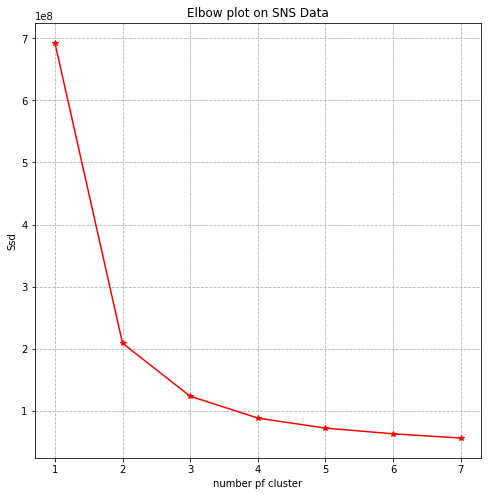

In [43]:
plt.figure(figsize=(8,8))
aa=np.absolute(aa)
abc=[1,2,3,4,5,6,7]
plt.plot(abc,aa,marker='*',color='r')
plt.xlabel('number pf cluster')
plt.ylabel('Ssd')
plt.title('Elbow plot on SNS Data')
plt.grid(linestyle='--')

In [46]:
kmeans_nba=KMeans(n_clusters=3,verbose=2)
kmeans_nba.fit(nba1)

Initialization complete
Iteration 0, inertia 144867929.38512596
Iteration 1, inertia 124216697.25652863
Iteration 2, inertia 123894962.93706004
Iteration 3, inertia 123774027.54859754
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 195286617.06739038
Iteration 1, inertia 145158823.4882851
Iteration 2, inertia 137498591.2342415
Iteration 3, inertia 134745200.48841083
Iteration 4, inertia 131139224.79090473
Iteration 5, inertia 128718562.70361255
Iteration 6, inertia 127689786.65949717
Iteration 7, inertia 127379502.91242278
Iteration 8, inertia 127177530.54893328
Iteration 9, inertia 127060982.51318431
Iteration 10, inertia 126977555.70888256
Iteration 11, inertia 126874463.08539025
Iteration 12, inertia 126845467.31588574
Iteration 13, inertia 126836086.62843348
Converged at iteration 13: strict convergence.
Initialization complete
Iteration 0, inertia 192965138.57690966
Iteration 1, inertia 130732106.8170764
Iteration 2, inertia 128718562.703

KMeans(n_clusters=3, verbose=2)

In [47]:
pd.DataFrame(kmeans_nba.cluster_centers_)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,3.632911,27.050633,15.822785,64.822785,20.734177,1339.993671,182.227848,403.227848,0.456057,39.424051,110.436709,0.286637,142.803797,292.791139,0.484830,0.502184,74.803797,102.341772,0.733095,64.297468,173.689873,237.987342,109.607595,43.006329,26.981013,70.620253,126.778481,478.683544
1,3.854015,26.262774,15.357664,75.277372,62.781022,2382.912409,418.321168,909.065693,0.461489,82.408759,225.277372,0.310105,335.912409,683.788321,0.490164,0.507336,214.729927,277.401460,0.774745,100.591241,317.875912,418.467153,242.481752,76.240876,43.824818,148.102190,179.277372,1133.781022
2,3.645161,26.231183,17.354839,27.204301,2.274194,306.478495,35.881720,85.564516,0.401333,8.252688,25.059140,0.281927,27.629032,60.505376,0.434777,0.443043,14.155914,20.725806,0.677882,15.618280,39.370968,54.989247,19.311828,8.892473,7.134409,16.763441,34.037634,94.172043


In [48]:
df_nba=pd.concat([nba,pd.Series(kmeans_nba.labels_)],axis=1)
df_nba.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end,0
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,4,15,0.266667,62,126,0.492063,0.482,35,53,0.660,72,144,216,28,23,26,30,122,171,2013-2014,2013,2
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,0,0,0.330976,93,185,0.502703,0.503,79,136,0.581,142,190,332,43,40,57,71,203,265,2013-2014,2013,0
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,0,0,0.330976,143,275,0.520000,0.520,76,119,0.639,102,204,306,38,24,36,39,108,362,2013-2014,2013,0
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,128,300,0.426667,336,711,0.472574,0.522,274,336,0.815,32,230,262,248,35,3,146,136,1330,2013-2014,2013,1
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,0,1,0.000000,136,248,0.548387,0.546,56,67,0.836,94,183,277,40,23,46,63,187,328,2013-2014,2013,0


In [49]:
df_nba.rename(columns={0:'Labels'},inplace = True)
df_nba.sort_values('Labels',ascending = False)

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end,Labels
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,4,15,0.266667,62,126,0.492063,0.482,35,53,0.660,72,144,216,28,23,26,30,122,171,2013-2014,2013,2
258,Doron Lamb,SG,22,ORL,53,0,695,63,160,0.394,36,90,0.400000,27,70,0.385714,0.506,29,36,0.806,8,41,49,43,11,1,27,54,191,2013-2014,2013,2
269,Jon Leuer,PF,24,MEM,49,0,642,121,246,0.492,23,49,0.469388,98,197,0.497462,0.539,37,47,0.787,37,121,158,20,18,13,27,63,302,2013-2014,2013,2
268,Meyers Leonard,C,21,POR,40,0,355,41,91,0.451,0,6,0.000000,41,85,0.482353,0.451,16,21,0.762,26,85,111,18,7,5,15,76,98,2013-2014,2013,2
266,Alex Len,C,20,PHO,42,3,362,33,78,0.423,0,0,0.330976,33,78,0.423077,0.423,20,31,0.645,39,60,99,4,4,18,26,68,86,2013-2014,2013,2
263,Ricky Ledo,SG,21,DAL,11,0,33,6,17,0.353,3,8,0.375000,3,9,0.333333,0.441,4,4,1.000,0,2,2,2,1,0,2,2,19,2013-2014,2013,2
261,Shane Larkin,PG,21,DAL,48,0,489,52,137,0.380,12,38,0.315789,40,99,0.404040,0.423,16,25,0.640,11,31,42,71,26,1,39,46,132,2013-2014,2013,2
260,Carl Landry,PF,30,SAC,18,1,233,31,60,0.517,0,0,0.330976,31,60,0.516667,0.517,14,17,0.824,15,42,57,5,3,1,9,34,76,2013-2014,2013,2
257,Ognjen Kuzmic,C,23,GSW,21,0,92,5,13,0.385,0,0,0.330976,5,13,0.384615,0.385,5,11,0.455,10,11,21,2,3,4,10,17,15,2013-2014,2013,2
321,Erik Murphy,C,23,CHI,24,0,62,3,13,0.231,0,3,0.000000,3,10,0.300000,0.231,0,0,0.751,2,6,8,2,0,4,2,7,6,2013-2014,2013,2


In [61]:
LABELS=pd.Series(kmeans_nba.labels_)

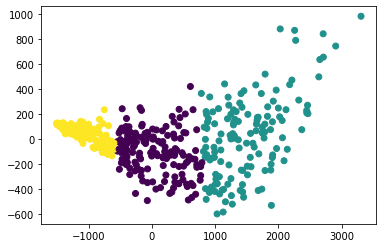

In [63]:
#plot players by clusters
from sklearn.decomposition import PCA
pca_2=PCA(2)
plot_columns=pca_2.fit_transform(nba1)
plt.scatter(x=plot_columns[:,0],y=plot_columns[:,1],c=LABELS)
plt.show()